In [3]:
import json
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import torch
import torchvision
import numpy as np
import cv2


print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 1.10.0
Torchvision version: 0.11.0
CUDA is available: True


In [4]:

# Load the configuration from the JSON file
with open('./config_data.json') as f:
    config = json.load(f)

frames_path = config["frames_path"]
exported_dinov2_features = config["exported_dinov2_features"]
exported_CLIP_features = config["exported_CLIP_features"]

# Load exported_hands_keypoints and exported_SAMHQ_ENIGMA from their respective files
with open(config["exported_hands_keypoints_path"]) as f:
    exported_hands_keypoints = json.load(f)

with open(config["exported_SAMHQ_ENIGMA"]) as f:
    exported_SAMHQ_ENIGMA = json.load(f)
    
    
print("exported_hands_keypoints:", len(exported_hands_keypoints))
print("exported_SAMHQ_ENIGMA: ",len(exported_SAMHQ_ENIGMA))

exported_hands_keypoints: 41136
exported_SAMHQ_ENIGMA:  45482


In [8]:
class_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'yellow',
    7: 'cyan',
    8: 'magenta',
    9: 'pink',
    10: 'brown',
    11: 'gray',
    12: 'olive',
    13: 'teal',
    14: 'indigo',
    15: 'salmon',
    16: 'gold',
    17: 'lime',
    18: 'violet',
    19: 'turquoise',
    20: 'darkred',
    21: 'lightblue',
    22: 'darkgreen',
    23: 'khaki',
    24: 'orchid',
    25: 'coral',
    26: 'sienna',
    'hand-left': 'darkblue',
    'hand-right': 'darkgreen',
    # Add more class_id-color mappings as needed
}

In [9]:
def read_npy_file(file_path):
    try:
        data = np.load(file_path)
        return data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

Going to print: 126_2918
/home/mmazzamuto/CLIP/CLIP/ENIGMA/exported_features/ViT-L/14@336px/126_2918.npy
DinoV2 features loaded, shape: (1, 1536)
CLIP features loaded, shape: (1, 768)


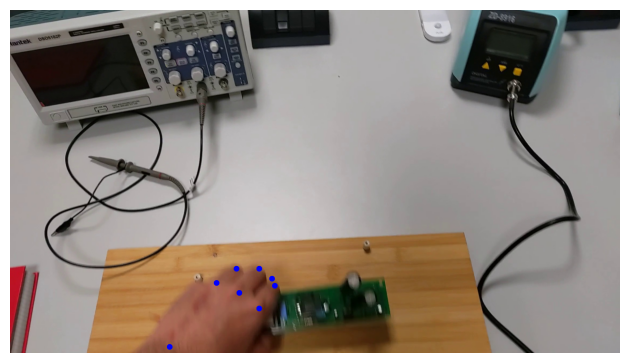

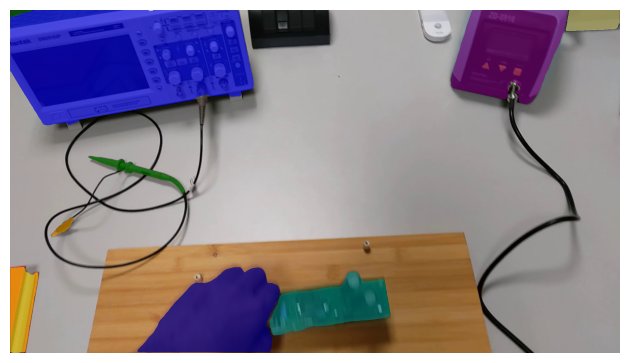

In [11]:
random_key = random.choice(list(exported_hands_keypoints.keys()))
random_value = exported_hands_keypoints[random_key]
#random_key="63_5057"
print(f"Going to print: {random_key}")




dinov2_loaded_data = read_npy_file(exported_dinov2_features + random_key + '.npy')
print(exported_CLIP_features + random_key + '.npy')
CLIP_loaded_data = read_npy_file(exported_CLIP_features + random_key + '.npy')
print(f"DinoV2 features loaded, shape: {dinov2_loaded_data.shape}")
print(f"CLIP features loaded, shape: {CLIP_loaded_data.shape}")


image = cv2.imread(frames_path+random_key+".jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
image = cv2.resize(image, (2272, 1278)) 
fig, ax = plt.subplots()

for hand in exported_hands_keypoints[random_key]:
    keypoints_filtered = [kp for kp, score in zip(hand['keypoints'], hand['keypoint_scores']) if score > 0.3]

    for x, y in keypoints_filtered:
        ax.add_patch(patches.Circle((x, y), radius=8, color='blue'))
        #print(frame_annotation_hands)
ax.imshow(image)
ax.axis('off')
plt.tight_layout()
plt.show()


# Dictionary to map class_id to colors (customize colors as per your preference)


masks_data_obj = exported_SAMHQ_ENIGMA[random_key]['objects']

for m in masks_data_obj:
    class_id = m['class_id']
    if class_id in class_colors:
        color = class_colors[class_id]
    for mask in m['segmentation']:
        x_coords = mask[::2]
        y_coords = mask[1::2]
        polygon = Polygon(list(zip(x_coords, y_coords)), facecolor=color, alpha=0.6)
        plt.gca().add_patch(polygon)
        
masks_data_hands= exported_SAMHQ_ENIGMA[random_key]['hands']       
for m in masks_data_hands:
    
    color=class_colors['hand-'+m['hand_side']]
    for mask in m['segmentation']:
        x_coords = mask[::2]
        y_coords = mask[1::2]
        polygon = Polygon(list(zip(x_coords, y_coords)), facecolor=color, alpha=0.7)
        plt.gca().add_patch(polygon)


plt.axis('off')
plt.tight_layout()
plt.imshow(image)
plt.show()

45482